## Time Series EDA
- https://www.kaggle.com/code/thebrownviking20/everything-you-can-do-with-a-time-series
- Reading material : https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-to-time-series-analysis/

In [1]:
# startdate = datetime(2022,12,1)
# enddate = datetime(2022,12,15)
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

import yfinance as yf
yf.pdr_override()
df_tesla = pdr.data.get_data_yahoo('TSLA')

[*********************100%%**********************]  1 of 1 completed


In [2]:
df_tesla.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-10,210.029999,215.380005,205.690002,214.649994,214.649994,130994000
2023-11-13,215.600006,225.399994,211.610001,223.710007,223.710007,140447600
2023-11-14,235.029999,238.139999,230.720001,237.410004,237.410004,149771600
2023-11-15,239.289993,246.699997,236.449997,242.839996,242.839996,150354000
2023-11-16,239.490005,240.880005,230.960007,233.589996,233.589996,136177700


<AxesSubplot:xlabel='Date'>

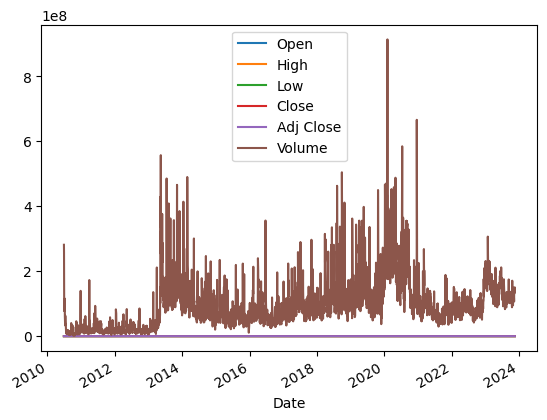

In [3]:
df_tesla.plot()

<AxesSubplot:xlabel='Date'>

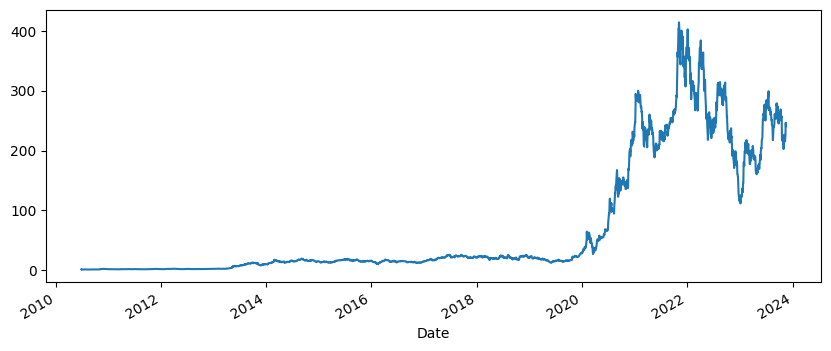

In [4]:
df_tesla['High'].plot(figsize=(10,4))

<AxesSubplot:xlabel='Date'>

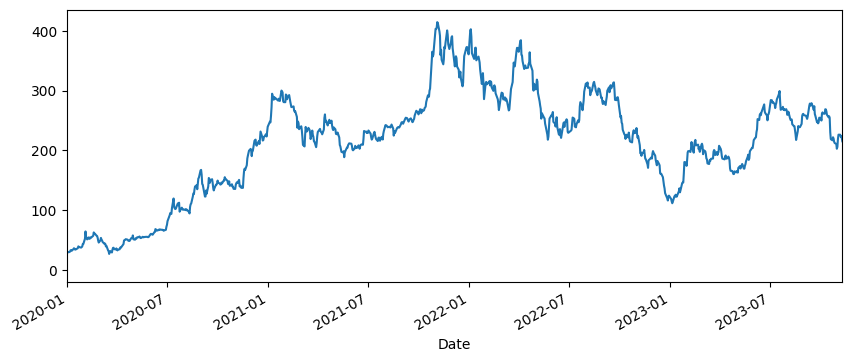

In [5]:
# addinf xlimit and ylimit
# yyyy-mm-dd
df_tesla['High'].plot(xlim=['2020-01-01','2023-11-09'],figsize=(10,4))

<AxesSubplot:xlabel='Date'>

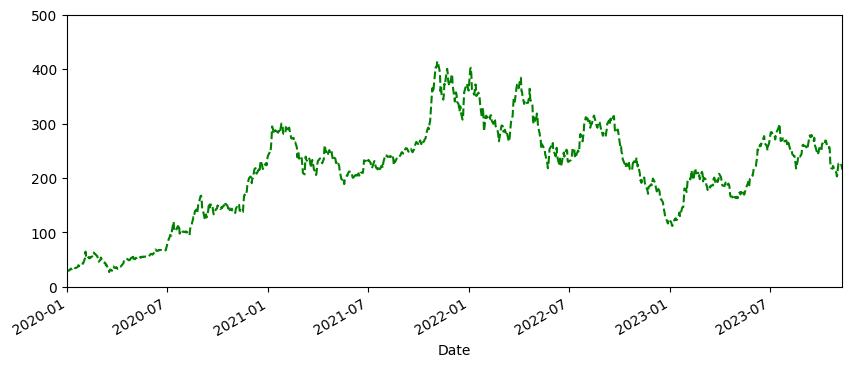

In [6]:
df_tesla['High'].plot(xlim=['2020-01-01','2023-11-09'],ylim=[0,500],figsize=(10,4),ls="--",c="green")

In [7]:
index = df_tesla.loc['2020-01-01':'2023-11-09'].index
share_open = df_tesla.loc['2020-01-01':'2023-11-09']['Open']

In [8]:
index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2023-10-27', '2023-10-30', '2023-10-31', '2023-11-01',
               '2023-11-02', '2023-11-03', '2023-11-06', '2023-11-07',
               '2023-11-08', '2023-11-09'],
              dtype='datetime64[ns]', name='Date', length=972, freq=None)

In [9]:
share_open

Date
2020-01-02     28.299999
2020-01-03     29.366667
2020-01-06     29.364668
2020-01-07     30.760000
2020-01-08     31.580000
                 ...    
2023-11-03    221.149994
2023-11-06    223.979996
2023-11-07    219.979996
2023-11-08    223.149994
2023-11-09    219.750000
Name: Open, Length: 972, dtype: float64

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline 

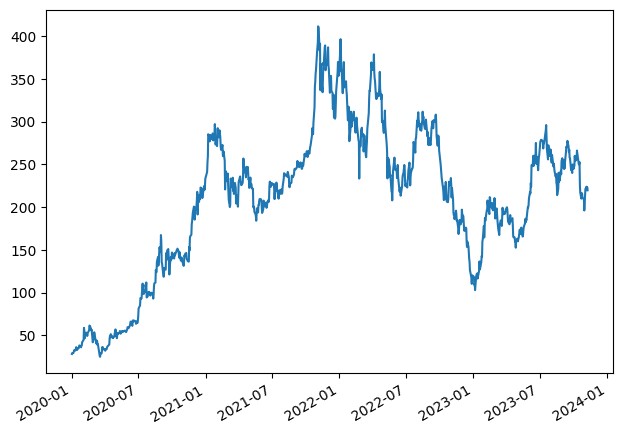

In [11]:
figure,axis = plt.subplots()
plt.tight_layout()
figure.autofmt_xdate()
axis.plot(index, share_open)

In [12]:
## DateTime index

In [13]:
df_tesla = df_tesla.reset_index() # ---> we will get Date as one column not as index

In [14]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3371 entries, 0 to 3370
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3371 non-null   datetime64[ns]
 1   Open       3371 non-null   float64       
 2   High       3371 non-null   float64       
 3   Low        3371 non-null   float64       
 4   Close      3371 non-null   float64       
 5   Adj Close  3371 non-null   float64       
 6   Volume     3371 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 184.5 KB


In [15]:
df_tesla= df_tesla.set_index("Date",drop=True)

In [16]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [17]:
from datetime import datetime, timedelta

In [18]:
datetime(2021,11,20)

datetime.datetime(2021, 11, 20, 0, 0)

In [19]:
# pd.to_datetime(df_tesla["Date"]) # obj to datetime
date = datetime.now() + timedelta(hours=4,minutes=0)
print(date)

2023-11-17 19:51:29.718585


In [20]:
print(date.date())
print(date.day)
print(date.month)
print(date.hour)

2023-11-17
17
11
19


In [21]:
# Time resampling
# - https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78#:~:text=Resampling%20is%20used%20in%20time,DatetimeIndex%2C%20PeriodIndex%2C%20or%20TimedeltaIndex.

In [22]:
df_tesla.resample(rule="A").min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,1.076000,1.108667,0.998667,1.053333,1.053333,1777500
2011-12-31,1.452000,1.484667,1.407333,1.455333,1.455333,3594000
2012-12-31,1.774667,1.790000,1.509333,1.519333,1.519333,5473500
2013-12-31,2.205333,2.225333,2.140667,2.194000,2.194000,6603000
2014-12-31,9.366667,9.800000,9.111333,9.289333,9.289333,19983000
2015-12-31,12.388667,12.619333,12.093333,12.333333,12.333333,10620000
2016-12-31,9.488000,10.331333,9.403333,9.578000,9.578000,24892500
2017-12-31,14.316667,14.688667,14.064000,14.466000,14.466000,32800500
2018-12-31,16.851999,17.355333,16.306000,16.704000,16.704000,46210500


In [23]:
df_tesla.resample(rule="A").max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,2.391333,2.428000,2.316667,2.364667,2.364667,281494500
2011-12-31,2.308667,2.333333,2.268667,2.329333,2.329333,172767000
2012-12-31,2.546000,2.663333,2.474000,2.534000,2.534000,85206000
2013-12-31,12.930667,12.966667,12.558000,12.891333,12.891333,557458500
2014-12-31,19.177999,19.427999,18.693333,19.069332,19.069332,490225500
2015-12-31,18.680000,19.110001,18.420000,18.817333,18.817333,234744000
2016-12-31,17.763332,17.955999,16.967333,17.694668,17.694668,356136000
2017-12-31,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500


<AxesSubplot:xlabel='Date'>

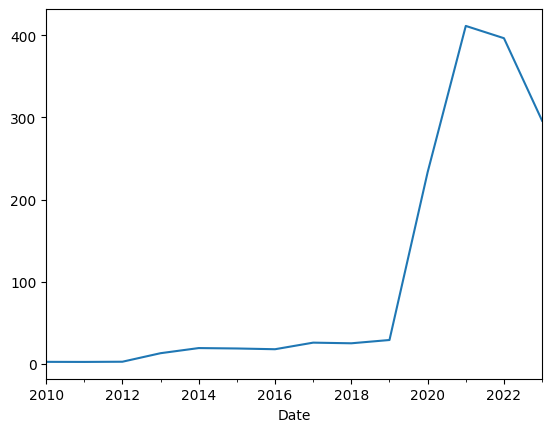

In [24]:
df_tesla.resample(rule="A").max()["Open"].plot()

<AxesSubplot:xlabel='Date'>

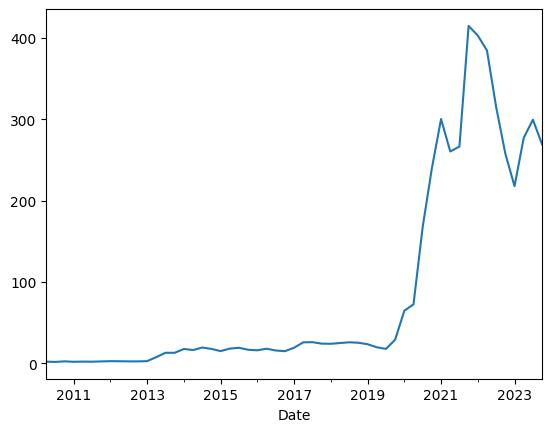

In [25]:
# quaterly start frequency
df_tesla.resample(rule="QS").max()["High"].plot()

<AxesSubplot:xlabel='Date'>

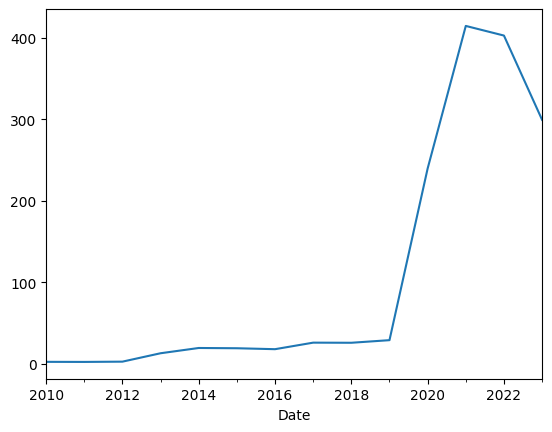

In [26]:
df_tesla.resample(rule="BA").max()["High"].plot()

In [27]:
df_tesla.resample(rule="BQS").max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-04-01,1.719333,2.028000,1.553333,1.592667,1.592667,281494500
2010-07-01,1.666667,1.728000,1.408667,1.465333,1.465333,123282000
2010-10-01,2.391333,2.428000,2.316667,2.364667,2.364667,139528500
2011-01-03,1.906000,1.914000,1.870000,1.896667,1.896667,172767000
2011-04-01,2.006667,2.100000,1.970000,2.009333,2.009333,93138000
2011-07-01,1.992667,2.029333,1.934000,1.982000,1.982000,45967500
2011-10-03,2.308667,2.333333,2.268667,2.329333,2.329333,58024500
2012-01-02,2.546000,2.663333,2.474000,2.529333,2.529333,82506000
2012-04-02,2.488667,2.564667,2.444667,2.534000,2.534000,83344500


<AxesSubplot:xlabel='Date'>

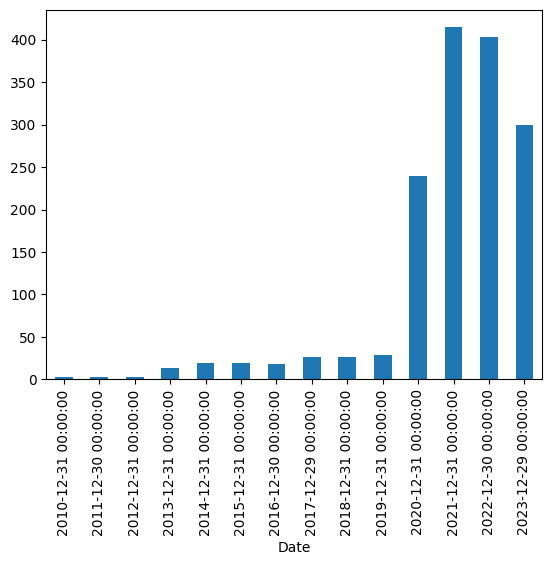

In [28]:
df_tesla.resample(rule="BA").max()["High"].plot(kind="bar")

In [29]:
df_tesla.resample(rule="M").mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-30,1.493000,1.847334,1.361333,1.590667,1.590667,2.696505e+08
2010-07-31,1.338222,1.376000,1.254413,1.303873,1.303873,4.612557e+07
2010-08-31,1.303030,1.327333,1.272030,1.300727,1.300727,1.025332e+07
2010-09-30,1.385270,1.418413,1.353937,1.382698,1.382698,1.288993e+07
2010-10-31,1.381556,1.399524,1.361714,1.380889,1.380889,4.677000e+06
...,...,...,...,...,...,...
2023-07-31,274.619499,278.525000,269.174001,273.505500,273.505500,1.196044e+08
2023-08-31,242.037391,246.754783,237.660000,242.333043,242.333043,1.087644e+08
2023-09-30,257.305002,262.094001,252.213001,256.968000,256.968000,1.219653e+08


In [30]:
df_tesla["High"].rolling(10).max().head(15)

Date
2010-06-29         NaN
2010-06-30         NaN
2010-07-01         NaN
2010-07-02         NaN
2010-07-06         NaN
2010-07-07         NaN
2010-07-08         NaN
2010-07-09         NaN
2010-07-12         NaN
2010-07-13    2.028000
2010-07-14    2.028000
2010-07-15    1.728000
2010-07-16    1.540000
2010-07-19    1.483333
2010-07-20    1.483333
Name: High, dtype: float64

In [31]:
df_tesla["Open:30Days rolling"] = df_tesla["Open"].rolling(2).max()

In [32]:
df_tesla.head(5)

,Open,High,Low,Close,Adj Close,Volume,Open:30Days rolling
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,1.719333
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,1.719333
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,1.666667
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,1.533333


<AxesSubplot:xlabel='Date'>

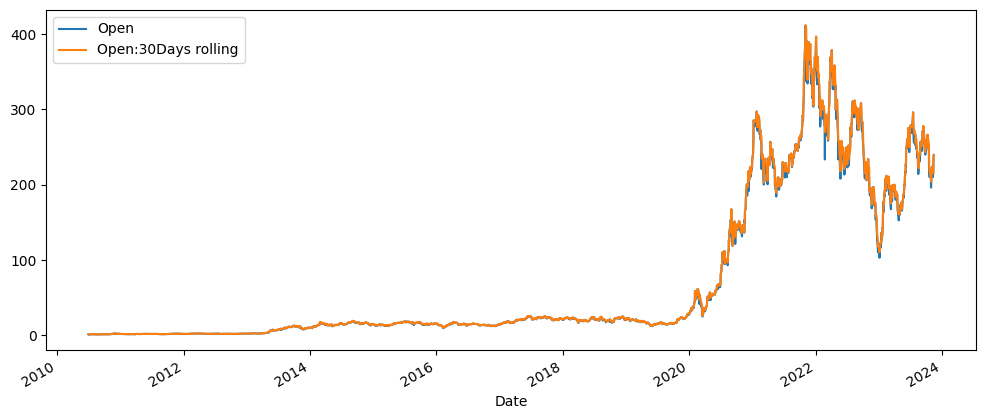

In [33]:
df_tesla[['Open','Open:30Days rolling']].plot(figsize=(12,5))

# TimeSeries,ETS,EWMA,ARIMA,SARIMAX, Fbprophet
- Simple moving avg
- cumulative moving avg
- Exponential weighted moving average (EWMA)
- Moving avg (Formula)(MA) (ACF)
- Auto Regressive model(AR) (PACF)
- MA + AR --> ARMA

In [34]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

import yfinance as yf
yf.pdr_override()
df_tesla = pdr.data.get_data_yahoo('TSLA')

[*********************100%%**********************]  1 of 1 completed


In [35]:
df_tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-11-10,210.029999,215.380005,205.690002,214.649994,214.649994,130994000
2023-11-13,215.600006,225.399994,211.610001,223.710007,223.710007,140447600
2023-11-14,235.029999,238.139999,230.720001,237.410004,237.410004,149771600


In [36]:
#  Simple Moving Avg --> used for smoothning the curv

<AxesSubplot:xlabel='Date'>

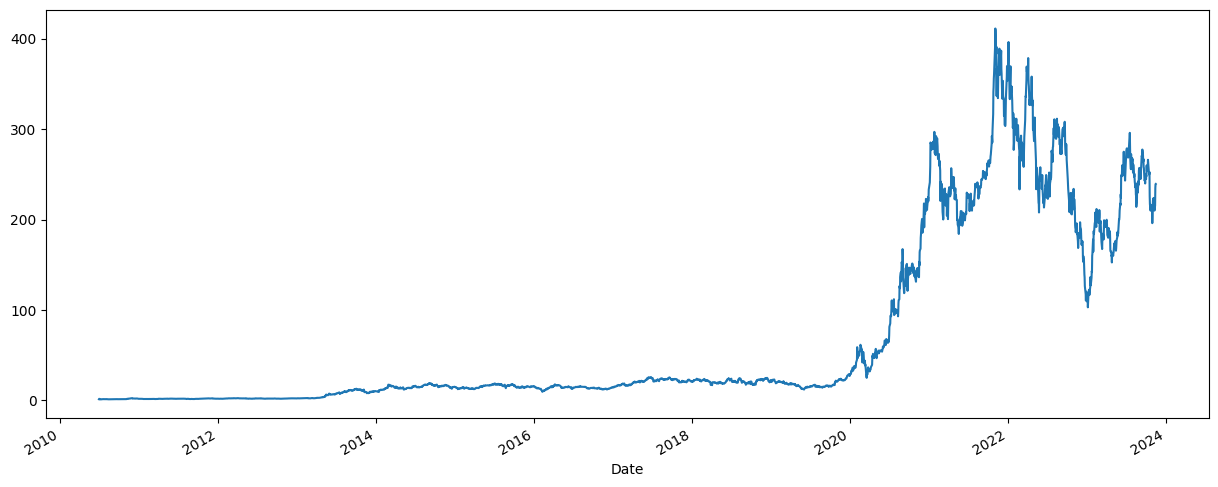

In [37]:
df_tesla['Open'].plot(figsize=(15,6))

In [38]:
df_tesla['Open:10day rolling'] = df_tesla['Open'].rolling(window=10,min_periods=1).mean()
df_tesla['Open:20day rolling'] = df_tesla['Open'].rolling(window=20,min_periods=1).mean()
df_tesla['Open:30day rolling'] = df_tesla['Open'].rolling(window=30,min_periods=1).mean()
# df_tesla['Open:50day rolling'] = df_tesla['Open'].rolling(window=50,min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

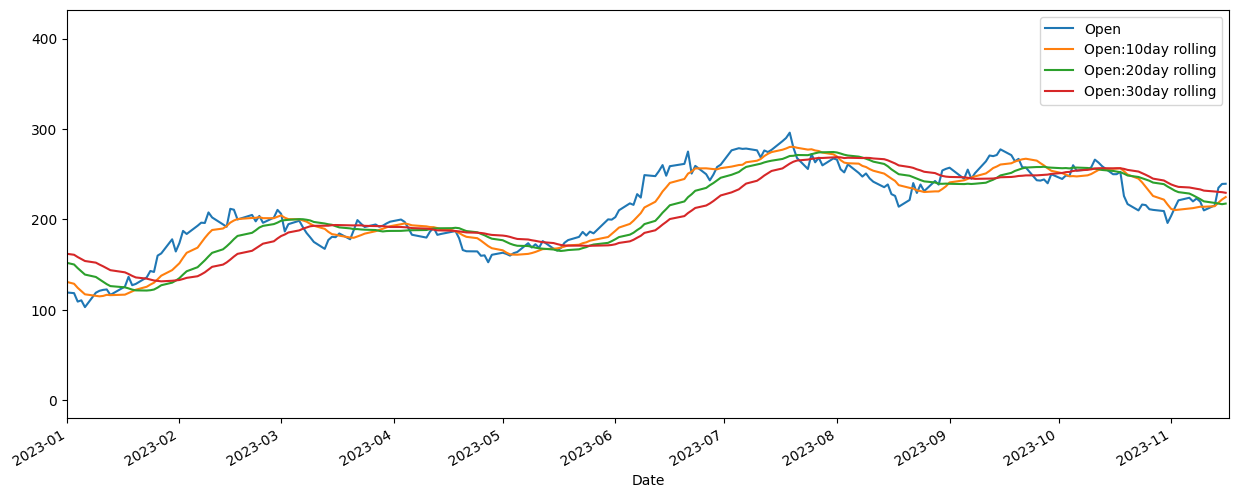

In [39]:
df_tesla[['Open','Open:10day rolling','Open:20day rolling','Open:30day rolling']].plot(xlim=['2023-01-01','2023-11-17'],figsize = (15,6))

<AxesSubplot:xlabel='Date'>

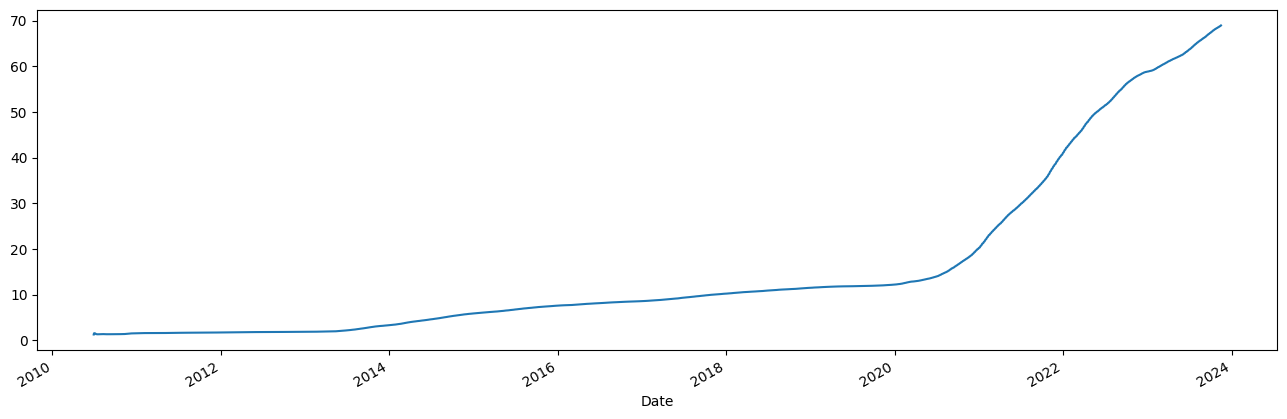

In [40]:
# expanding

# cumilative moving avg (CMA)
df_tesla["Open"].expanding().mean().plot(figsize=(16,5))

In [41]:
## EMA (Exponential moving Average)
# multiplier = (2/window_side + 1) 
# EMA = ((actual_value-previous_EMA)*multiplier + prev_EMA)


## EWMA (Exponential weighted moving Average)
# multiplier = (2/window_side + 1) 
# EWMA = ((actual_value-previous_EMA)*multiplier + prev_EMA)


In [42]:
df_tesla["EMA_open_0.1"] = df_tesla["Open"].ewm(alpha=0.1,adjust=False).mean()
# df_tesla["EMA_open_0.3"] = df_tesla["Open"].ewm(alpha=0.3,adjust=False).mean()
df_tesla["EMA_open_5day"] = df_tesla["Open"].ewm(span=5,adjust=False).mean()

<AxesSubplot:xlabel='Date'>

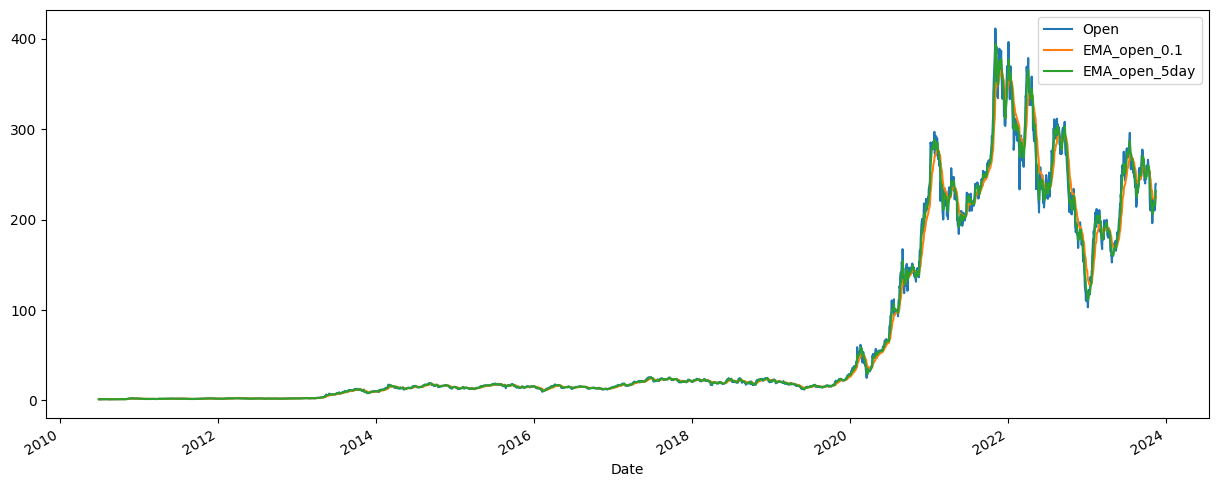

In [43]:
df_tesla[["Open","EMA_open_0.1","EMA_open_5day"]].plot(figsize=(15,6))

In [44]:
# ARIMA model --> auto regressive + moving avg 
# It is mostly used for forcasting (sales, monthly spend)

{}


In [207]:
def formatAmount(n): 
    s, *d = str(n).partition(".") 
    r = ",".join([s[x-2:x] for x in range(-3, -len(s), -2)][::-1] + [s[-3:]]) 
    return "".join([r] + d)
a = 81234567.45
print(formatAmount(a))

8,12,34,567


81234567
3 5 >>>>>> 34
1 3 >>>>>> 12
0 1 >>>>>> 
['567']


In [204]:
s = "81234567"
",".join([s[x-2:x] for x in range(-3, -len(s), -2)][::-1])
    
    

-5 -3 >>>>>>>>> 34
-7 -5 >>>>>>>>> 12
-9 -7 >>>>>>>>> 8


'7'

In [211]:
def is_it_valid_pin(input_string):
    # Remove special characters and spaces
    if input_string.isdigit():
        return True if len(input_string) == 6 else False
    else:
        return False


In [242]:
def is_it_valid_pan(panCardNo):
    import re
    panCardNo = panCardNo.lower()
    regex = "[a-z]{5}[0-9]{4}[a-z]{1}"
    p = re.compile(regex)
    if panCardNo is None:
        return False
    return True if (re.search(p, panCardNo) and len(panCardNo)== 10) else False
    

In [253]:
is_it_valid_pan("AbCDe1134q")

True

In [294]:
def is_it_valid_dob(input_string):
    from datetime import datetime
    final_string = input_string.replace(".","/").replace("-","/").replace("_","/").replace(",","/")
    print(final_string)
    try:
        z = datetime.strptime(final_string,"%d/%m/%Y")
        return True
    except:
        try:
            z = datetime.strptime(final_string,"%d/%m/%y")
            return True
        except:
            return False

is_it_valid_dob("12,11,12")

12/11/12


True

In [301]:
def call_whatsapp(bot_details):
    """
    Note: action name and the function name should match
    Mandatory: response_object has to be returned. 
    """
    # Response object - it can be used to send back response messages and dialog instances
    import requests
    url = "https://api.gupshup.io/sm/api/v1/msg"
 
    payload = 'channel=whatsapp&source=919019963447&destination=917041295305&message=Hi, Please use this link to make the payment https://pay.gnani.ai&src.name=gwappapi3'
    headers = {
      'Cache-Control': 'no-cache',
      'Content-Type': 'application/x-www-form-urlencoded',
      'apikey': 'sksy40jooa5f1nmsjrj8i6vudo3nurtm',
      'cache-control': 'no-cache'
    }
 
    response = requests.request("POST", url, headers=headers, data=payload)
    print(response.text)
    return (response.text)
   

In [302]:
bot_details = {}
call_whatsapp(bot_details)

{"status":"submitted","messageId":"51b66d10-88d2-42fe-8ad6-588fd6aa9232"}


'{"status":"submitted","messageId":"51b66d10-88d2-42fe-8ad6-588fd6aa9232"}'